# Assignment 1

First we need to import a few modules, execute the cell below:

In [2]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [3]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    cosx = numpy.cos(x)
    return cosx ;


You can use the following cell to check that your code works for scalar arguments:

In [4]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [5]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [6]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    dx = (-1)*(numpy.sin(x))
    return dx ;


In [7]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [8]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [9]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    fx = (f(x)-f(x-dx))/dx
    return fx ;

In [10]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


Text(0.5,1,'Difference of analytical and numerical differentials at varying values of dx')

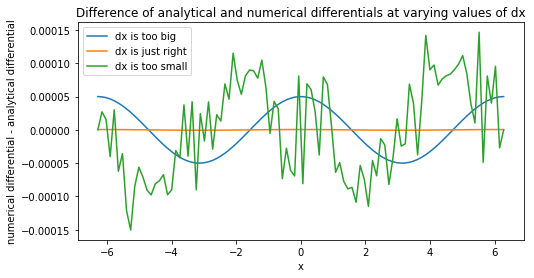

In [17]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
line1 = plt.plot(xs, df_dx_1 - df_dx_analytical, label = "dx is too big")
line2 = plt.plot(xs, df_dx_2 - df_dx_analytical, label = "dx is just right")
line3 = plt.plot(xs, df_dx_3 - df_dx_analytical, label = "dx is too small")
plt.xlabel("x")
plt.ylabel("numerical differential - analytical differential")
plt.legend()
plt.title("Difference of analytical and numerical differentials at varying values of dx" )

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When dx is too large the numerical differential loses accuracy as the line joining x and x + dx gets further from approximating the tangent of the curve at x which the analytical differential uses. With the numerical differentil we are attemting to approximate the tangent of the curve at a point the bigger dx is the futher our approximation is from the true value so the less accurate it is. In the case of it being too small the computer can only store a limited number of digits in an number that we give it if we give it a small number such as 1e-12 it will store this accordingly, however when we add this to 1 in the calculation of our differential it cannot store it as 1.0000000000001 as this is too many digits so it only stores 1 with a number of zeros after the decimal place , when it needs the full number again it does makes up the digits it lost previously. It is impossible for us to predict the made up digits based on our original number so the accuracy is lost.